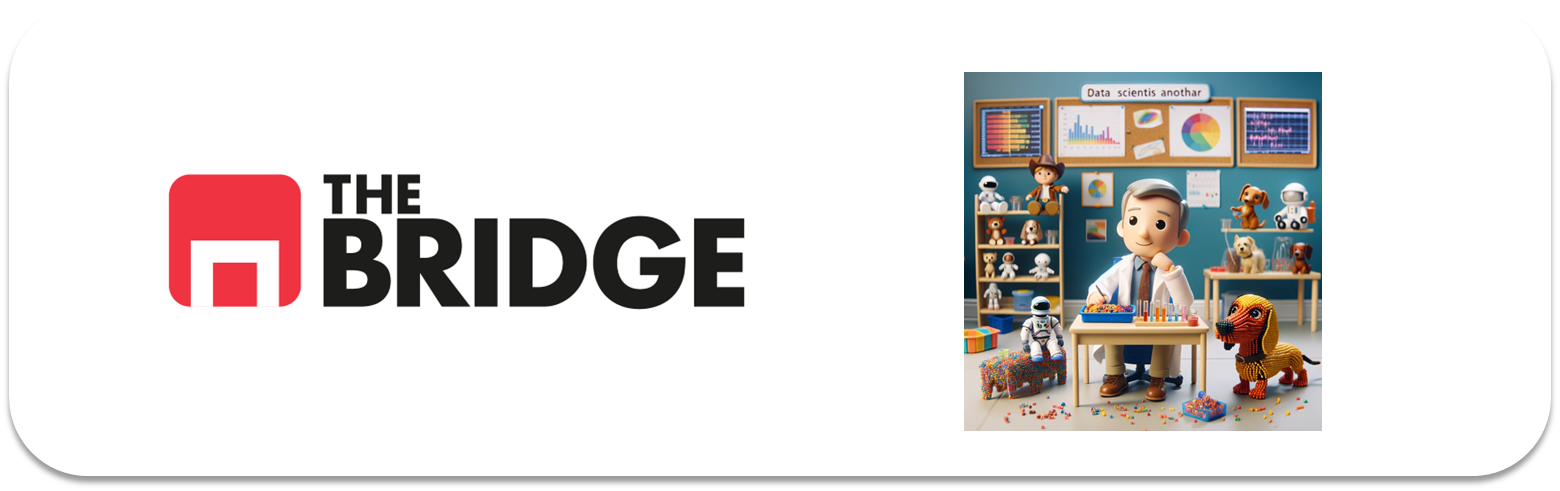

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(sns.get_dataset_names())




['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```python sns.load_dataset(<nombre_del_dataset)``` a una variable "df_titanic"

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df_titanic = sns.load_dataset('titanic')

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

Si existen nulos, pero hay tb muchas columnas con la misma informacion como son: sex y who: se puede borrar una de ellas; pclass con class, expresan la misma informacion una en tipo int y otra tipo string, por lo que tb se puede borrar una de ellas; embarked y embark_town, expresan lo mismo pero una son las iniciales de la ciudad y en la otra aparece la palabra entera dela ciudad, por lo que tb se puede eliminar una de ellas, Alive y survived, aportan la misma informacion si sobrevio o no, asi que tambien eliminamos una de ellas.<br>
Ademas Dexk presenta un 77,2 de valores NaN y es una columna que no aporta informacion importante(el nivel de cabina del pasajero), pero auqnue lo fuera tiene valores NaN muy altos, asi que la eliminamos.<br>


In [ ]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#traducir las columnas
df_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# Crear un diccionario con los nuevos nombres de las columnas
dict_titanic= {
    'survived':"superviviente",
      'pclass':"clase",
      'sex': "sexo",
      'age': "edad",
      'sibsp': "familiares_a_bordo",
      'parch':"parch",
      'billete' :"precio_billete",
       'embarcado':"lugar_embarque",
         'class': "clase",
         'who':"genero",
         'adult_male': "adulto_masculino",
         'deck': "nivel_cabina",
         'embark_town':"ciudad_embarque",
       'alive': "vive",
       'alone': "solo",
    }
df_titanic.rename(columns=dict_titanic, inplace= True)

In [ ]:
df_titanic.head(10)

,superviviente,clase,edad,familiares_a_bordo,precio_billete,genero,ciudad_embarque,vive,solo
0,0,3,22.000000,1,7.2500,man,Southampton,no,False
1,1,1,38.000000,1,71.2833,woman,Cherbourg,yes,False
2,1,3,26.000000,0,7.9250,woman,Southampton,yes,True
3,1,1,35.000000,1,53.1000,woman,Southampton,yes,False
4,0,3,35.000000,0,8.0500,man,Southampton,no,True
5,0,3,29.699118,0,8.4583,man,Queenstown,no,True
6,0,1,54.000000,0,51.8625,man,Southampton,no,True
7,0,3,2.000000,3,21.0750,child,Southampton,no,False
8,1,3,27.000000,0,11.1333,woman,Southampton,yes,False
9,1,2,14.000000,1,30.0708,child,Cherbourg,yes,False


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [ ]:
#eliminamos parch
#df_titanic.drop(columns="parch", inplace=True)

#porcentaje de nulos
porcentaje = df_titanic.isna().mean()*100
porcentaje

superviviente         0.000000
clase                 0.000000
edad                  0.000000
familiares_a_bordo    0.000000
precio_billete        0.000000
genero                0.000000
ciudad_embarque       0.224467
vive                  0.000000
solo                  0.000000
dtype: float64

Debido al alto porcentaje de nulos en "deck" y son los niveles de las cabinas de los pasajeros, que no va aportar mucha informacion por lo que la eliminamos


In [ ]:

#df_titanic.drop(columns="nivel_cabina", inplace=True)


A la variable edad le voy a hacer la media y se lo voy aplicar a los NaN, quedando 2 nulos en la variable ""lugar_embarqque" y 2 nulos en "ciudad de embarque", por lo que los dejamos, ya qye no implican mucha importancia de datos. 

In [ ]:

#media
media_edad= df_titanic.edad.mean()
media_edad
# Reemplazar NaN con la media en la columna
df_titanic['edad'].fillna(media_edad, inplace=True)

######borramos la columnas traducida "lugar_embarque"

#df_titanic.drop(columns="lugar_embarque", inplace=True)

##### pclass y class aportan la misma informaciuon , una en numero y otra en string, por lo que voy a limiar la tipo string: class

#df_titanic.drop(columns="clase", inplace=True)

#### sexo y genero aportan el mismo nivel de informacion por lo que procedo a eliminar la columna"sexo"

#df_titanic.drop(columns="sexo", inplace=True)

#### las clumnas adulto_masculino y genero aportan la misma informacion , por lo que procedo a elimnar la columna adulto masculino

#df_titanic.drop(columns="adulto_masculino", inplace=True)


In [ ]:
df_titanic.info() # ahora esta limpio , quedando 2 NaN en ciudad de embarque que no afecta mucho a la infdormacion total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   superviviente       891 non-null    int64  
 1   clase               891 non-null    int64  
 2   edad                891 non-null    float64
 3   familiares_a_bordo  891 non-null    int64  
 4   precio_billete      891 non-null    float64
 5   genero              891 non-null    object 
 6   ciudad_embarque     889 non-null    object 
 7   vive                891 non-null    object 
 8   solo                891 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.7+ KB


In [ ]:
df_titanic.superviviente.value_counts()

superviviente
0    549
1    342
Name: count, dtype: int64

In [ ]:
df_titanic.superviviente.unique()

array([0, 1], dtype=int64)

In [ ]:
# miramos la variabilidad o disipersion entre las variables numericas
df_titanic.describe().loc[["std","mean"]].T*100

# todas tiene un alta variabilidad ya que superan el 30% estando cerca la variable superviciente

,std,mean
superviviente,48.659245,38.383838
clase,83.607124,230.864198
edad,1300.201523,2969.911765
familiares_a_bordo,110.274343,52.300786
precio_billete,4969.342860,3220.420797


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.



|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|supervivientes|columna con 2 valores 0 y 1 - supervientes y fallecidos|numérica discreta tipo int64|target|
|clase|establece el tipo de clase: alta(1), media(2) y baja(3)|numerica_discreta o categoriga ordinal tipo int64|target|
|edad| establece la edad de los pasajeros| numerica discreta tipo float64| se tendra en cuenta| 
|familiares_a_bordo| establece si habia familiares o conyugues| numerica discreta tipo int64| importante|
|precio_billete| precio pagado por cada pasajero|numerica continua tipo float 64| importante|
|genero| el sexo de cada pasejero|categórica nominal tipo object|
|ciudad_embarque| ciudad donde se montaron cada uno de los pasajeros|categórica nominal tipo object|no importante| pero la tendre en cuenta
|vive| si aun permanece vivo el pasajero en el presente| categórica nominal tipo object| desrcartamos
|solo| establece si el pasajero vivio o murio solo o con familiares o conyuges| numerica discreta tipo booleana| 


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

Las tres ciudades son : 
1. Southampton (Inglaterra), siendo su salida el 10/12/1912 y puerto de partida del Titanic .<br>
2. Cherburgo (Francia), haciendo parada el mismo dia de su salida.<br>
3. Queenstown (Irlanda), ciudad ahora conocida como Cobh, a la cual llego el 11 de abril.



In [ ]:
df_titanic["ciudad_embarque"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [ ]:
### si nos fijamos en los valores unicos de la columna ciudad de embarque ya esta en el datframe la informacion, y yo descarte 
# la columna lugar de embarque , que es donde venian las iniciales de esas ciudades, ya que carecia de sentido tener 2 columnas que 
# apportan el mismo valor.

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [ ]:
# EN PRIMER LUGAR VAMOS A HALLAR LA CARDINALIDAD

cardinalidad= pd.DataFrame([df_titanic.nunique(), (df_titanic.nunique()/len(df_titanic)*100), df_titanic.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})

cardinalidad


,Card,%_Card,Tipo
superviviente,2,0.224467,int64
clase,3,0.3367,int64
edad,89,9.988777,float64
familiares_a_bordo,7,0.785634,int64
precio_billete,248,27.833895,float64
genero,3,0.3367,object
ciudad_embarque,3,0.3367,object
vive,2,0.224467,object
solo,2,0.224467,bool


In [ ]:
columnas_excluidas = ["familiares_a_bordo", "vive"]

cardinalidad["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
cardinalidad.loc[cardinalidad.Card == 2, "Clasificada_como"] = "Numerica Discreta"
cardinalidad.loc[cardinalidad["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
cardinalidad.loc[cardinalidad["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
cardinalidad

,Card,%_Card,Tipo,Clasificada_como
superviviente,2,0.224467,int64,Numerica Discreta
clase,3,0.3367,int64,Categorica
edad,89,9.988777,float64,Numerica Discreta
familiares_a_bordo,7,0.785634,int64,Categorica
precio_billete,248,27.833895,float64,Numerica Discreta
genero,3,0.3367,object,Categorica
ciudad_embarque,3,0.3367,object,Categorica
vive,2,0.224467,object,Numerica Discreta
solo,2,0.224467,bool,Numerica Discreta


### #2.1 Categóricas 
CATEGORIGAS NOMINALES GENERO(WHO) Y CIUDAD DE EMBARQUE(EMBARKED)

In [ ]:
columnas_categoricas = [df_titanic.genero, df_titanic.ciudad_embarque]

In [ ]:
#moda
df_titanic["genero"].mode()



0    man
Name: genero, dtype: object

In [ ]:
#funcion para calcular histograma y diagrama de caja
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(2,)


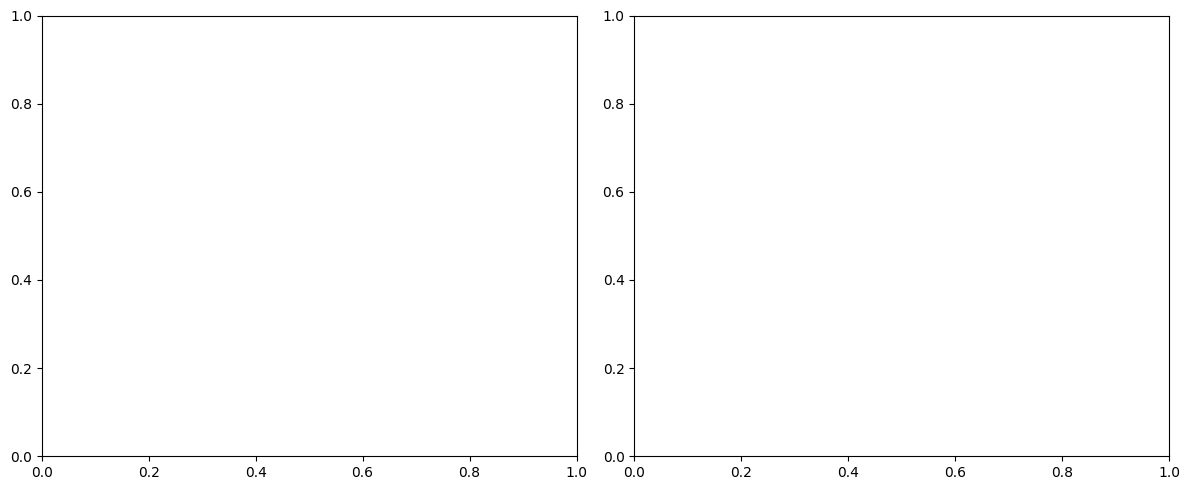

In [ ]:
plot_combined_graphs(df_titanic, ["genero"], whisker_width= 4.5)

In [ ]:
#funcion para vewr la distribucion por categorias
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
#pinta_distribucion_categoricas(df_titanic, ["genero"], relativa = True) me da error 

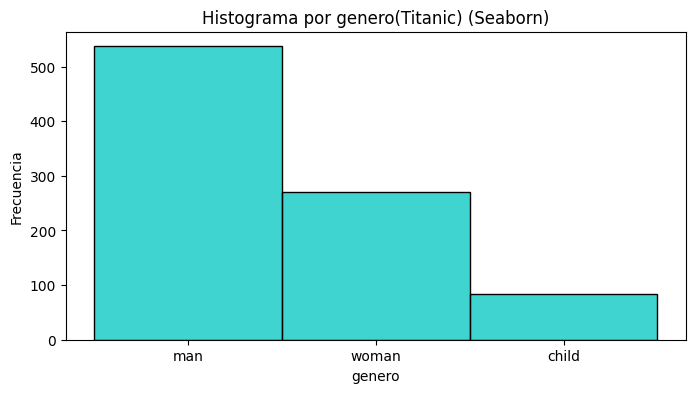

In [ ]:
# Histograma con Seaborn
plt.figure(figsize=(8, 4))
sns.histplot(df_titanic['genero'], color='#00C6C2')
plt.title('Histograma por genero(Titanic) (Seaborn)')
plt.xlabel('genero')
plt.ylabel('Frecuencia')
plt.show()

CIUDAD_EMBARQUE

In [ ]:
#ciudad_embarque
df_titanic.ciudad_embarque.mode()

0    Southampton
Name: ciudad_embarque, dtype: object

(2,)


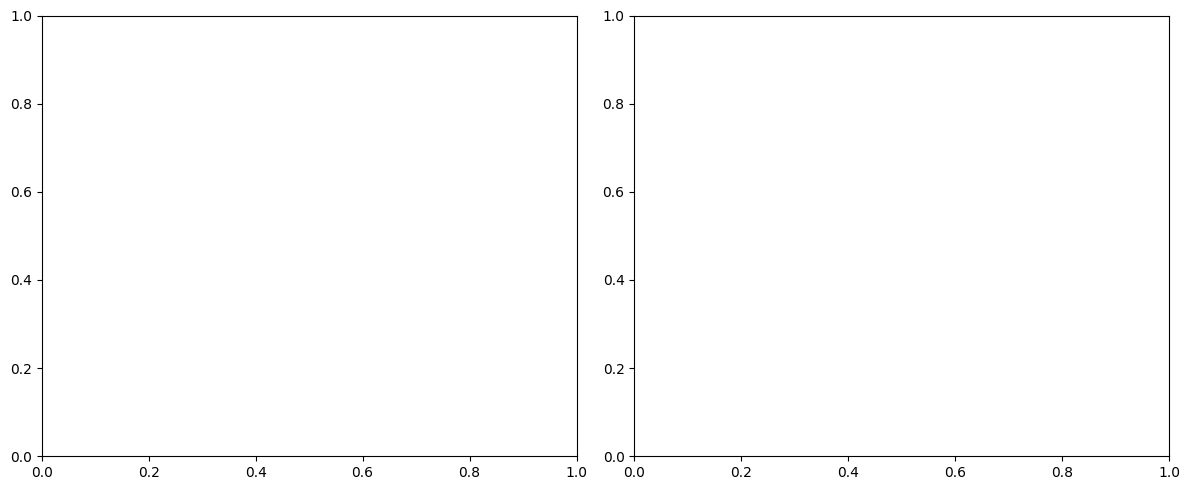

In [ ]:
plot_combined_graphs(df_titanic, ["ciudad_embarque"], whisker_width= 4.5)

In [ ]:
#pinta_distribucion_categoricas(df_titanic, ["ciudad_embarque"], relativa = True) no funciona en visual studio

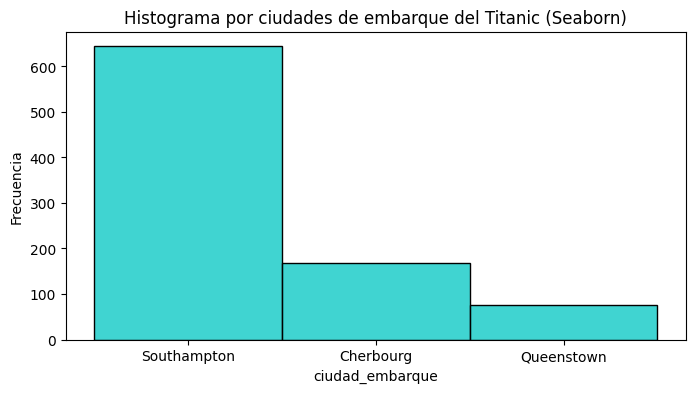

In [ ]:

# Histograma con Seaborn
plt.figure(figsize=(8, 4))
sns.histplot(df_titanic['ciudad_embarque'], color='#00C6C2')
plt.title('Histograma por ciudades de embarque del Titanic (Seaborn)')
plt.xlabel('ciudad_embarque')
plt.ylabel('Frecuencia')
plt.show()

# CONCLUSIONES(PARTE 1)


1.GENERO:<BR>
- La moda es Man, y en los pasajeros del Titanic hay un poco mas del doble de hombres(550) que de mujeres(270). Tambien hubo niños pero en menor proporcion( menos de 100)
- la formula de la distribucion no me funciona.
2. CIUDAD_EMBARQUE:<BR>
- la moda es la ciudad de salida del Titanic: Southmpton y es donde se subieron la mayoria de los pasajeros( 650), que es mas del doble que los que se subieron en las ciudades de Cherbourq(200) y Queenstown(100).
    

### #2.2 Numéricas

In [ ]:
# info general Max, mediam, desviacion tipica, los 3 cuartiles y el max del dataframe completo, pero ahora las veremos una a una

df_titanic.describe()

,superviviente,clase,edad,familiares_a_bordo,precio_billete
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,13.002015,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [ ]:
df_titanic.solo.describe()

count      891
unique       2
top       True
freq       537
Name: solo, dtype: object

In [ ]:
#valores maximos de las columnas numericas
max= df_titanic.describe().max()
max

superviviente         891.0
clase                 891.0
edad                  891.0
familiares_a_bordo    891.0
precio_billete        891.0
dtype: float64

In [ ]:
max_solo = df_titanic.solo.max() 
max_solo

True

In [ ]:
#valores minimoss de las columnas numericas

min=df_titanic.describe().min()
min

superviviente         0.000000
clase                 0.836071
edad                  0.420000
familiares_a_bordo    0.000000
precio_billete        0.000000
dtype: float64

In [ ]:
min_solo= df_titanic.solo.describe().min()
min_solo

True

In [ ]:
# la media de las columnas numericas

media=df_titanic.describe().mean()
media

superviviente         111.733804
clase                 113.268089
edad                  137.602531
familiares_a_bordo    112.703219
precio_billete        192.323930
dtype: float64

In [ ]:
media_solo=df_titanic.solo.mean()
media_solo

0.6026936026936027

In [ ]:
# prmer Quartil (Q1) de las columnas nuemricas

Q1=df_titanic.describe().loc["25%"]
Q1

superviviente          0.0000
clase                  2.0000
edad                  22.0000
familiares_a_bordo     0.0000
precio_billete         7.9104
Name: 25%, dtype: float64

In [4]:
df_titanic.describe().median()

NameError: name 'df_titanic' is not defined

In [ ]:
# la mediana de las columnas numericas o 2 quartil(Q2)

mediana=df_titanic.describe().loc["50%"]
mediana

superviviente          0.000000
clase                  3.000000
edad                  29.699118
familiares_a_bordo     0.000000
precio_billete        14.454200
Name: 50%, dtype: float64

In [ ]:
# tercer quartil de las columnas nuemricas
Q3=df_titanic.describe().loc["75%"]
Q3

superviviente          1.0
clase                  3.0
edad                  35.0
familiares_a_bordo     1.0
precio_billete        31.0
Name: 75%, dtype: float64

In [ ]:
#hallamos las columnas numericas
columnas_numericas = df_titanic.describe().columns.tolist()

In [ ]:
#hallamos la frecuencia absoluta
for catego in columnas_numericas:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para superviviente
superviviente
0    549
1    342
Name: count, dtype: int64



para clase
clase
3    491
1    216
2    184
Name: count, dtype: int64



para edad
edad
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64



para familiares_a_bordo
familiares_a_bordo
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64



para precio_billete
precio_billete
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64





In [ ]:
#hallamos la frecuencia relactiva
for catego in columnas_numericas:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para superviviente
superviviente
0    61.616162
1    38.383838
Name: count, dtype: float64



para clase
clase
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64



para edad
edad
29.699118    19.865320
24.000000     3.367003
22.000000     3.030303
18.000000     2.918070
28.000000     2.805836
               ...    
36.500000     0.112233
55.500000     0.112233
0.920000      0.112233
23.500000     0.112233
74.000000     0.112233
Name: count, Length: 89, dtype: float64



para familiares_a_bordo
familiares_a_bordo
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64



para precio_billete
precio_billete
8.0500     4.826038
13.0000    4.713805
7.8958     4.264871
7.7500     3.815937
26.0000    3.479237
             ...   
35.0000    0.112233
28.5000    0.112233
6.2375     0.112233
14.0000    0.112233
10.5167    0.112233
Name: count, Length: 248, dtype: float64





In [ ]:
df_titanic.precio_billete.nlargest(50)

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
299    247.5208
380    227.5250
557    227.5250
700    227.5250
716    227.5250
527    221.7792
377    211.5000
689    211.3375
730    211.3375
779    211.3375
318    164.8667
856    164.8667
268    153.4625
332    153.4625
609    153.4625
297    151.5500
305    151.5500
498    151.5500
708    151.5500
31     146.5208
195    146.5208
269    135.6333
325    135.6333
373    135.6333
319    134.5000
337    134.5000
334    133.6500
660    133.6500
390    120.0000
435    120.0000
763    120.0000
802    120.0000
215    113.2750
393    113.2750
659    113.2750
306    110.8833
550    110.8833
581    110.8833
698    110.8833
307    108.9000
Name: precio_billete, dtype: float64

In [ ]:
df_titanic.precio_billete.nsmallest(16)

179    0.0000
263    0.0000
271    0.0000
277    0.0000
302    0.0000
413    0.0000
466    0.0000
481    0.0000
597    0.0000
633    0.0000
674    0.0000
732    0.0000
806    0.0000
815    0.0000
822    0.0000
378    4.0125
Name: precio_billete, dtype: float64

In [ ]:
# comprobamos  el coeficiente de variabilidad
def coeficiente_variabilidad(df):
    df_var= df.describe().loc[["std","mean"]].T
    df_var["CV"]= df_var["std"]/df_var["mean"]*100
    return df_var

In [ ]:
coeficiente_variabilidad(df_titanic)

#los coeficientes de variabilidad son muy altos excepto en las variables clase y edad , que aunque sean altos se acercan al limite maximo del 30%

,std,mean,CV
superviviente,0.486592,0.383838,126.770139
clase,0.836071,2.308642,36.214851
edad,13.002015,29.699118,43.779130
familiares_a_bordo,1.102743,0.523008,210.846437
precio_billete,49.693429,32.204208,154.307253


In [ ]:
#establecer los rangos de las variables númericas

rango=df_titanic.describe().loc["max"] - df_titanic.describe().loc["min"]
rango

superviviente           1.0000
clase                   2.0000
edad                   79.5800
familiares_a_bordo      8.0000
precio_billete        512.3292
dtype: float64

In [ ]:
#hallar el rango intercuartilico o IQR
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [ ]:
get_IQR(df_titanic, columnas_numericas)

superviviente          1.0000
clase                  1.0000
edad                  13.0000
familiares_a_bordo     1.0000
precio_billete        23.0896
dtype: float64

In [ ]:
# coeficiente de correlacion de Pearson entre las variables numericas(valores entre 1 y -1)

# Calcular la matriz de correlación usando la funcion de pandas, corr(), permite 
#calcular la correlación entre las variables numéricas de un DataFrame
correlacion = df_titanic[["superviviente","clase","edad","familiares_a_bordo","precio_billete","solo"]].corr()


correlacion

,superviviente,clase,edad,familiares_a_bordo,precio_billete,solo
superviviente,1.000000,-0.338481,-0.069809,-0.035322,0.257307,-0.203367
clase,-0.338481,1.000000,-0.331339,0.083081,-0.549500,0.135207
edad,-0.069809,-0.331339,1.000000,-0.232625,0.091566,0.179775
familiares_a_bordo,-0.035322,0.083081,-0.232625,1.000000,0.159651,-0.584471
precio_billete,0.257307,-0.549500,0.091566,0.159651,1.000000,-0.271832
solo,-0.203367,0.135207,0.179775,-0.584471,-0.271832,1.000000


In [ ]:
# VALORES MEDIOS DEL INDICE CORRELACIONAL DE PEARSON

# Seleccionar las columnas de interés para la correlación
columnas_interes = ["superviviente", "clase", "edad", "familiares_a_bordo", "precio_billete", "solo"]
correlacion = df_titanic[columnas_interes].corr()

# Calcular el valor medio de todos los valores en la matriz de correlación
valor_medio_T = correlacion.values.mean()

# Calcular el valor medio por variable (columna)
valor_medio_variable = correlacion.mean()

# Mostrar los resultados
print(f" El valor medio de la matriz de correlacion de Pearson es: {valor_medio_T} y su valor medio por cada variable:\n{valor_medio_variable}")

 El valor medio de la matriz de correlacion de Pearson es: 0.07165786784676415 y su valor medio por cada variable:
superviviente         0.101721
clase                -0.000172
edad                  0.106262
familiares_a_bordo    0.065052
precio_billete        0.114532
solo                  0.042552
dtype: float64


GRAFICOS

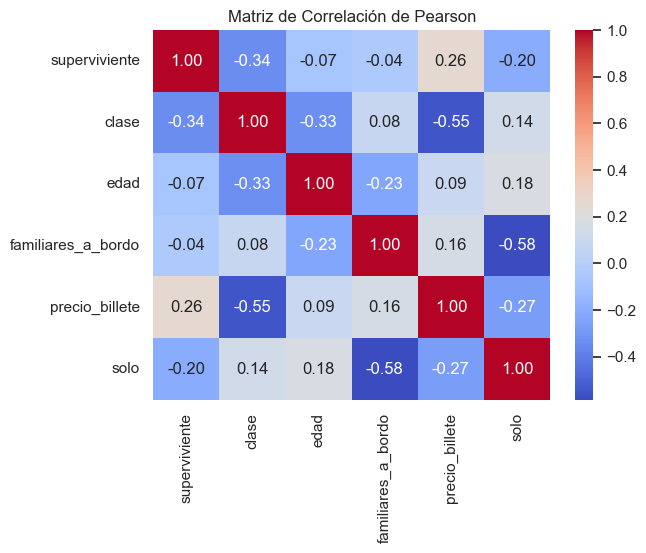

In [ ]:
# Seleccionar las columnas de interés para la correlación
columnas_interes = ["superviviente", "clase", "edad", "familiares_a_bordo", "precio_billete", "solo"]
correlacion = df_titanic[columnas_interes].corr()# Calcular la matriz de correlación usando la funcion de pandas, corr() que permite 
#calcular la correlación entre las variables numéricas de un DataFrame

# Crear un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")#  annot, agrega los valores de correlaciónen cada celda del mapa de calor
# cmap establce la paleta de colores q usara y fmt=".2f, que solo se mostraran 2 decimales
plt.title('Matriz de Correlación de Pearson')
plt.show() # muestra

In [ ]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

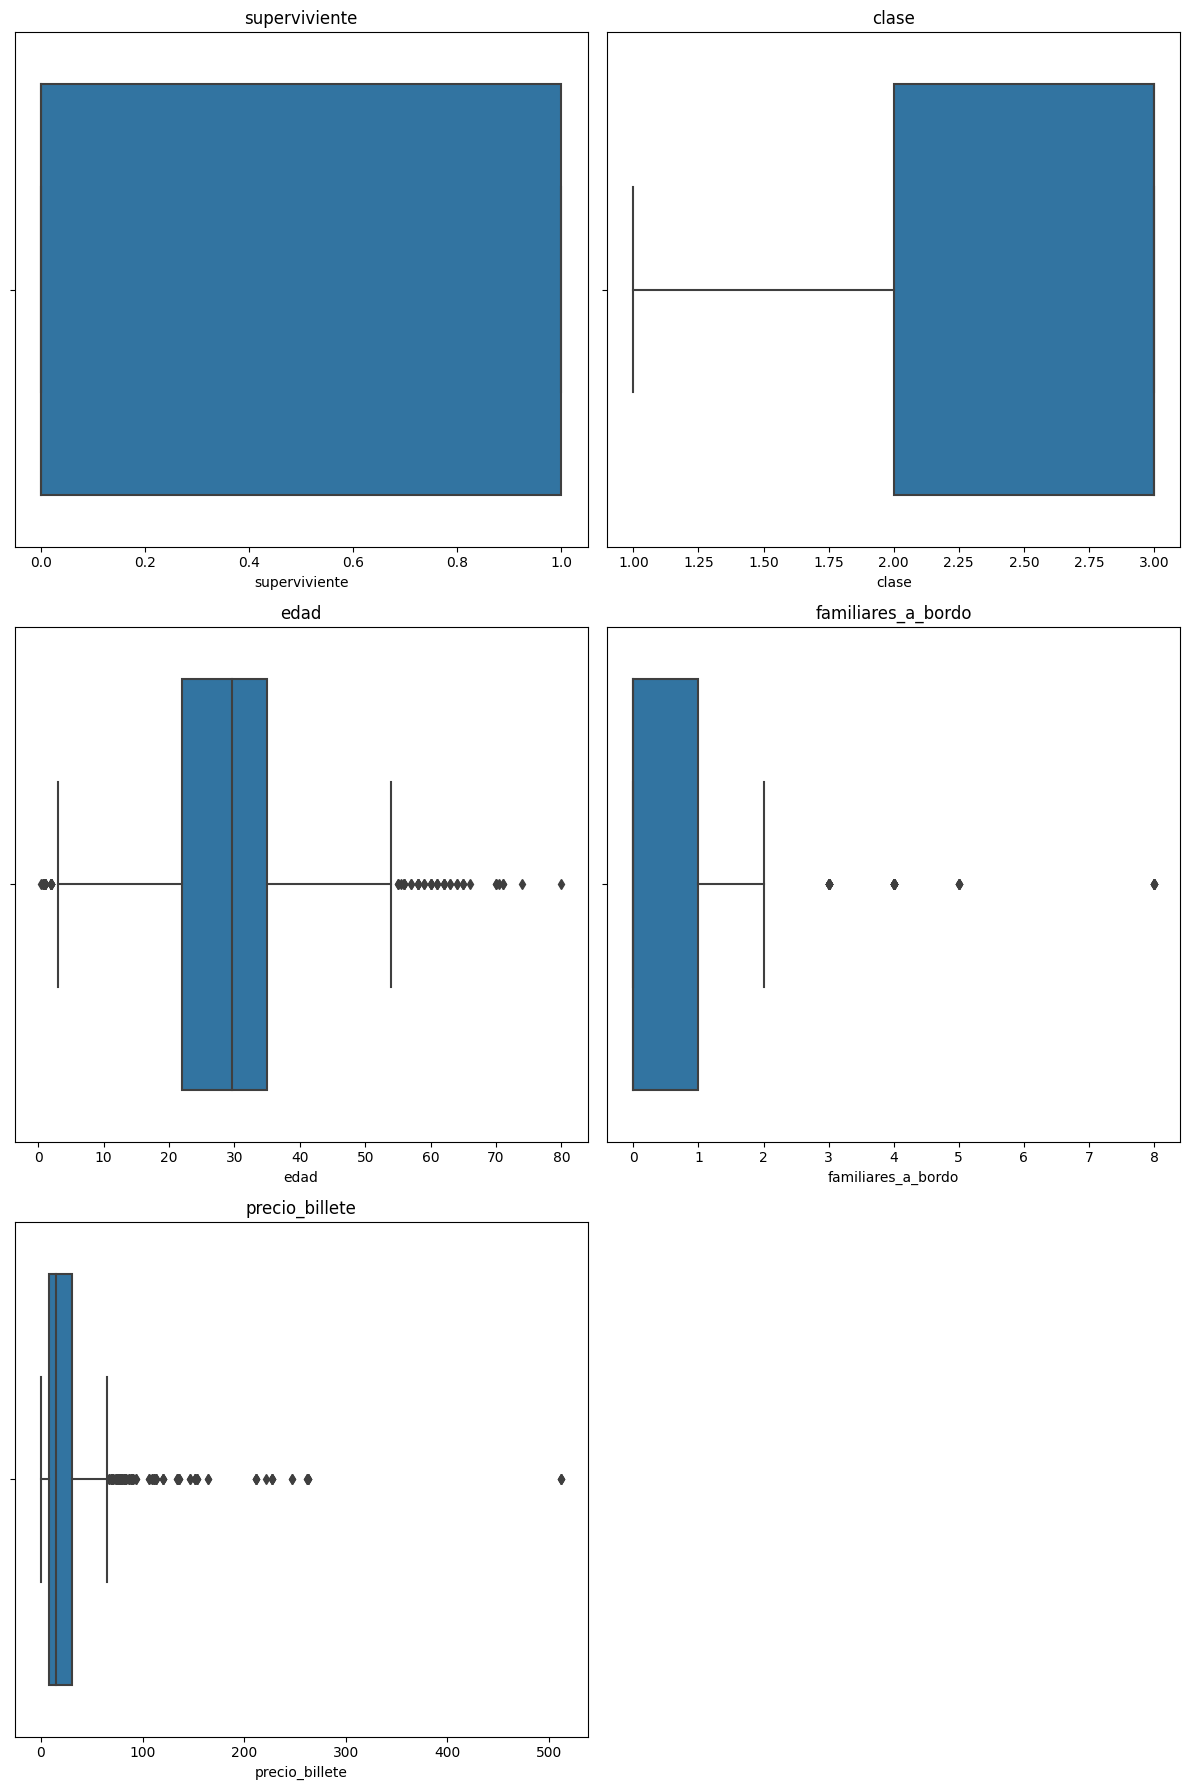

In [ ]:

plot_multiple_boxplots(df_titanic, columnas_numericas)


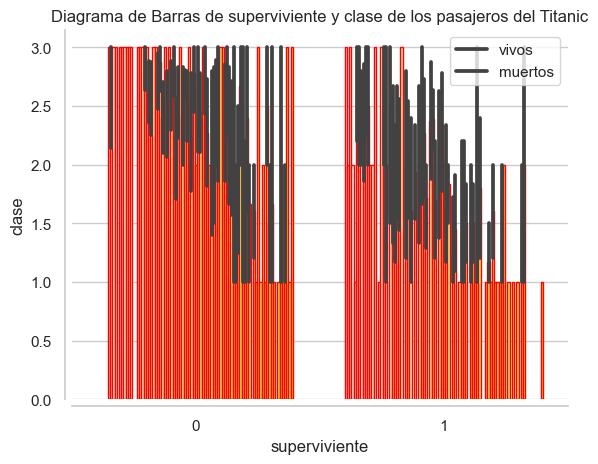

In [ ]:
#diagramas de barrras de supervivientes con clases , en relacion al genero

# Crear el diagrama de barras de superviviente, clase y edad
sns.barplot(x=df_titanic['superviviente'], y=df_titanic['clase'], hue=df_titanic['edad'], color='yellow', edgecolor='red')
# X e y especifica la variable para cada eje. hue se usa para codificar un color a la varible edad durante el diagrama, despues color es 
# el color de las barras y edfecolor el del borde

# Agregar un título y etiquetas a las ejes
plt.title('Diagrama de Barras de superviviente y clase de los pasajeros del Titanic')
plt.xlabel('superviviente')
plt.ylabel('clase')
# Agregar error bars
sns.despine(offset=5)
# Agregar una leyenda
plt.legend(['vivos', 'muertos'])
# Mostrar el diagrama de barras
plt.show()



In [ ]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()




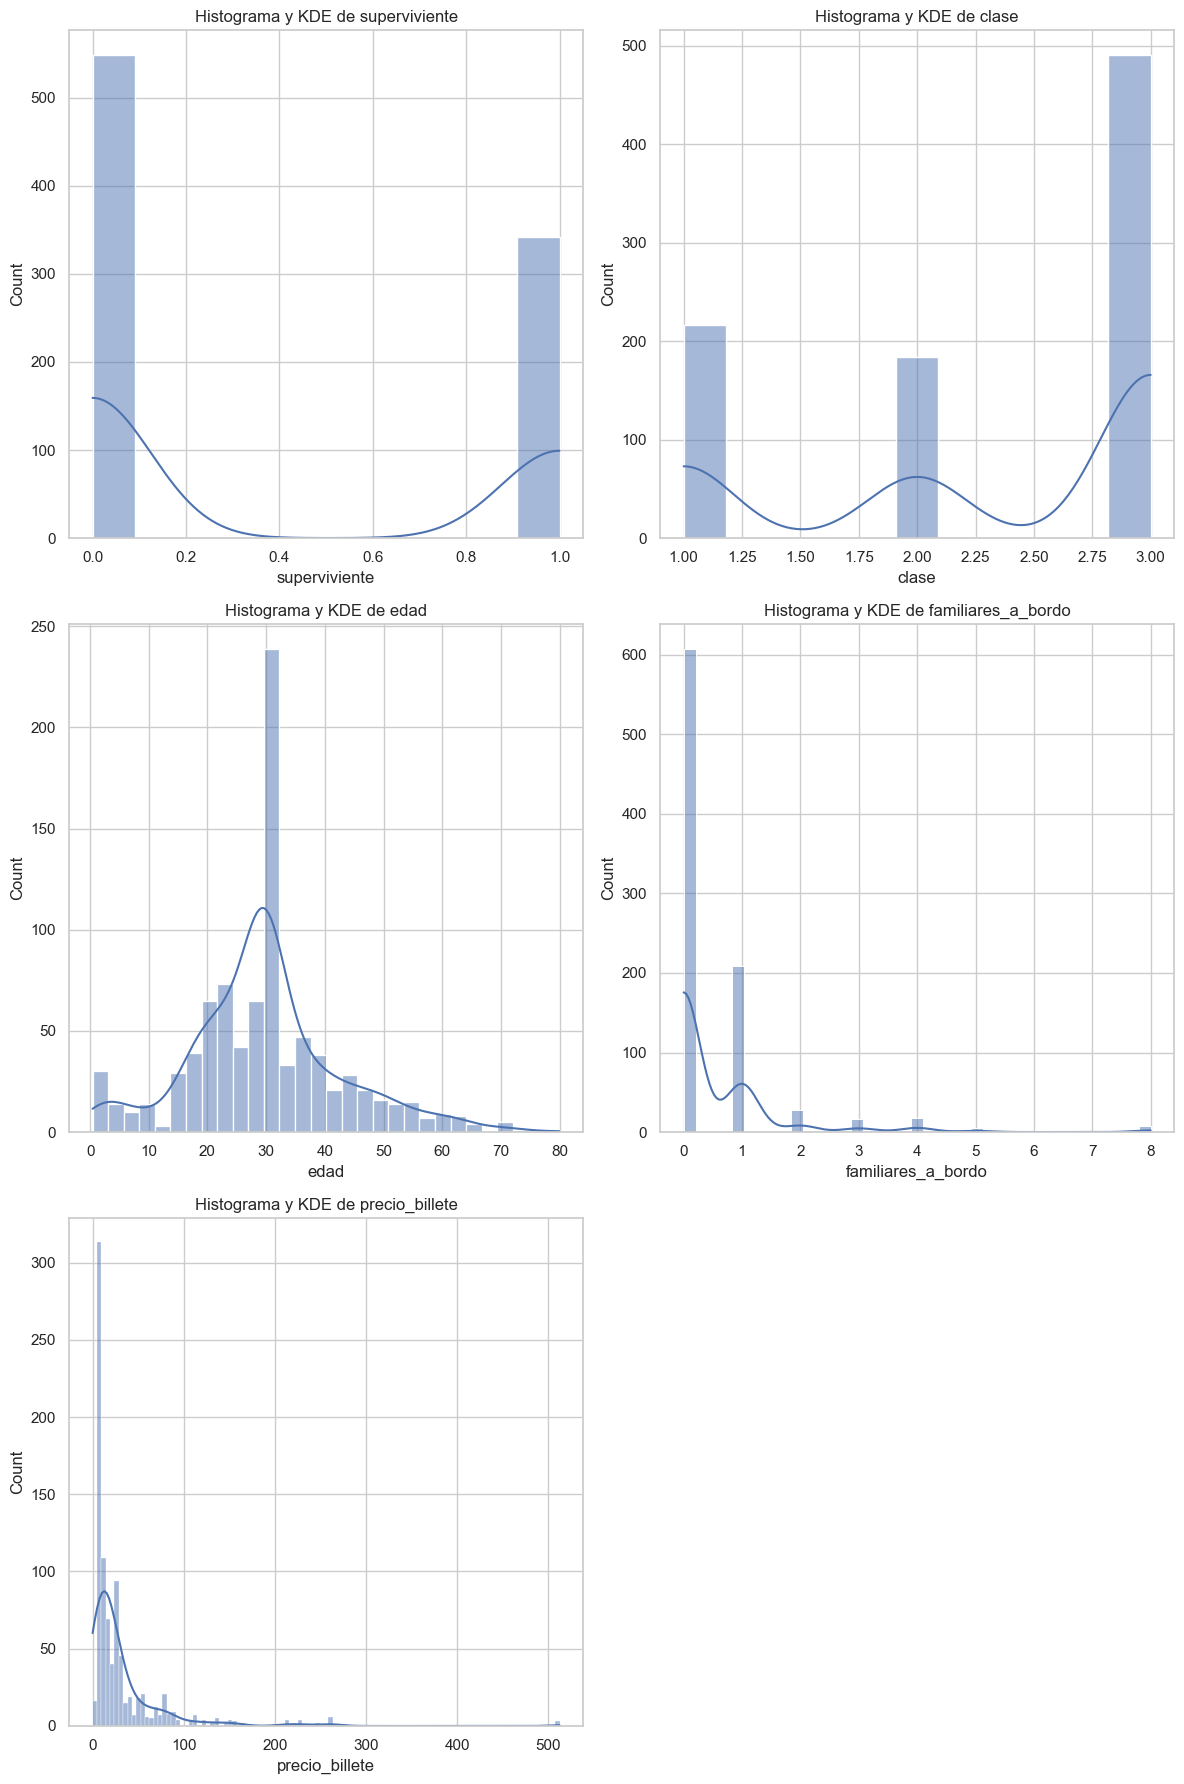

In [ ]:
columnas_numericas = df_titanic.describe().columns.to_list()

plot_histo_den(df_titanic,columnas_numericas)

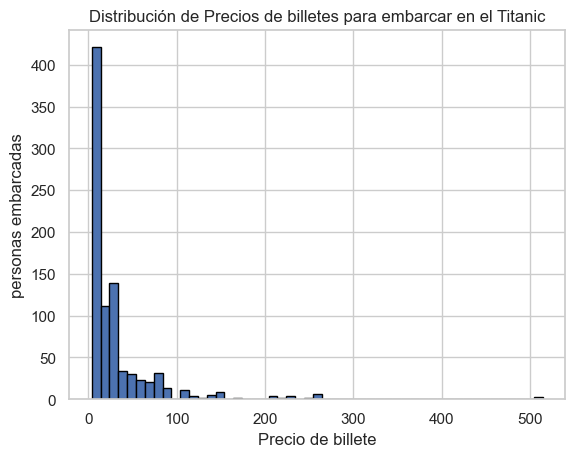

In [ ]:
# Análisis de Distribución de Precios (binning)

valor_minimo = 4
valor_maximo = 512
num_asistentes = 891

# Crear datos de precios (puedes tener datos reales aquí)
precios = df_titanic.precio_billete

# Crear un histograma
plt.hist(precios, bins=range(valor_minimo, valor_maximo + 10, 10), edgecolor='black')
plt.xlabel('Precio de billete')
plt.ylabel('personas embarcadas')
plt.title('Distribución de Precios de billetes para embarcar en el Titanic')
plt.show()

# CONCLUSIONES(PARTE 2)


1. SUPERVIVIENTE: <br>
- En esta variable encontramos una gran diferencia entre la media (111.73) con la mediana que es 0, lo que sugiere una distribucion de datos asimetrica, manifestando la presencia de valores atipicos o extremos, los cuales afectan mucho a la media pero no tanto a la mediana ya que ella parte del un conjunto dividido entre 2. En este caso la direccion de la simetria esta sesgada hacia la derecha, donde algunos valores extremadamente altos  estan inflando la media.<br>
- Respecto a los Quartiles, tieneun valor de Q1= 0 y de Q3=1, lo que indican que el 25% de los datos son iguales o menores que 0, el 50% está entre 0 y 1, y el 25% son iguales o mayores que 1. El indice intercuartílico(IQR) es 1, indicando que no hay gran dispersión de los datos en ese intervalo, pero tampoco es simetrico<br>
- El 61,61% sobrevivieron a la catastrofe, falleciendo un numero mayo de hombres (549) que de mujjeres(342). Aunque no existe el dato, tendiendo en cuenta las clases, 491 personas del total de pasajeros(891), es decir el 55,10% eran de la clase 3(baja), un 20,65% de la clase 2(media) y un 24,24% de la clase 1(alta), por lo que estadisticamente es mas problable que haya mayor numero de finados en las clase baja.
2. CLASE:<BR>
Esta variable tambien presenta una gran diferencia entre ma media (113.26) con la mediana(3.0), el cuartil Q1 es igual a 2 y Q3 igual a 3, por lo que el 25% de tus datos está por debajo de 2, 50% de tus datos está por debajo de 3, y el 75% de tus datos está por debajo de 3, siendo su rango intercuartílico es 1.<br>
- Como se puede ver Q2 y Q3 coinciden, lo que  indica  que la mitad de sus datos esta concetrado en un solo valor , siendo inusual salvo en conjunto de datos repetidos, siendo una variable muy concentrda alrededor del 3 ques es la mediana, por lo que tambien es simetrica.
<br>
3. PRECIO_BILLETE.- Sigue presentando una gran diferencia entre la media y la mediana, los cuartiles 1 y 3 presentan valores de 7.91 y 31, lo que implica el mayor rango intercuartilico (IQR): 23.09, por lo que el 25% de tus datos está por debajo de 7.91, El 50% de tus datos está por debajo de 14.45 y El 75% de tus datos está por debajo de 31. <br>
- Al haber una diferencia importante entre Q2 y Q3, y la mediana esta mas cerca del valor Q1, por lo que podria tener una distribucion sesgada hacia la izquierda, con una larga cola que sobrepasaria el limite minimo de -1,5 veces el IQR. Por otro lado, observando los valores maximos y minimos de la venta de los billetes, se observa que los 15 ultimos no pagaron dinero alguno y a partir del 16 de modo ascendente pago el primer billete por un valor de 4.0125 y el billete mas caro costo 512.3292 y como se puede observar en la grafica de analisis de precios con bins, hay cierta normalidad en la progresion del precio hasta llegar a 45, donde hay una subida alta, bajando un poco para finalemnte pegar una subida casi del 400%, seguramente debido a que eran fechas cercanas a la salida del barco "mas seguro del mundo".
4. EDAD:<br>
- Al igual que las anteriores, presenta una media muy alta(137,60) y un mediana muy baja (29,69), lo que implica la presencia de valores extremos que son los que influyen mas a la media que a la mediana. Respecto a los cuartiles 1 y 3 presentan valores mas elevados(22 y 35), por lo que el 25% de los datos están por debajo de 22, el 50% están entre 22 y 35, y el 25% están por encima de 35, al tener una mediana cerca del rango intercuartilico(13) indica la posicion central de los datos, pero en este caso tras la visualizacion se extederian los datos hacia el maximo sobrepasando el 1.5 veces el IQR, presentando outliers.<br>
5. SOLO:<br>
Esta variable boolena expplica si la persona que sobrevivio o no, lo hizo solo o en compañia de familiares o conyuges: al ser una variable boolena se puede pasar a valores 0 y 1. Se le han calculado valores centrales, teniendo un valor min y max de valor "true"(1) y una media de 0.60, consta de 891 registros con dos tipos unicos y una frecuencia de 537. 


ESTUDIO DE LA CORRELACION DE PEARSON


La correlacion entre la misma variable siempre dara una correlacion positiva perfecta, pero entre las demas destacan:<br>
1. la mayor correlaccion entre 2 variables distintas la tienen las variables familiares_a_bordo y solo con un valor de -0.58, lo que implica que son parcialmente correlacionales pero desde un punto de vista inversamente proporcional, es decir si una aumenta otra dismnuye, pero es la que presenta una correleacion mas fuerte respecto a las otras<br>
2. La menor correlacon la tienen las variables familiares_a_bordo con suverviviente con un valor de -0,03, casi no tienen relacion lineal por estar tan cerca del valor 0.
3. El valor medio de todas las correlaciones esta en 0.716, y el valor medio correlacional de todas las variables esta muy cercana al 0 , es decir debil o casi ausencia de relacion lineal entre ellas.